`Aim:` *Notebook for the purpose of Climate Risk Assessment lecture:* `Download from AWS`

`Author:` Hugo Banderier

`Notes:` Remeber `del` command to free up memory when a python object is not used anymore !

# Load CESM2-LE data

For your project, we suggest you work with **CESM2-LE** data. This acronym stands for "Community Earth System Model 2 - Large Ensemble", a project of several universities in the US and in Korea. 

This dataset is the output of the CESM2 model, run 100 times independently, i.e. an ensemble of 100 members in modelling jargon. There are many output variables, on the surface or on 20+ vertical levels, for an output period of 250 years. There are 165 years in the historical period with measured concentrations of CO2 (1850-2015) and 85 years run with CO2 concentrations following the ssp370 scenario.

More details of how these runs are created, that are not very important for us, can be found [on their website](https://www.cesm.ucar.edu/community-projects/lens2).

What's great about it is this enormous amount of data is that *everything* is available online, either on their website with direct downloads or, for a subselection of output variables, on the Amazon AWS servers, a much more convenient way to access it. In this notebook, we demonstrate how to access the latter, and we advise you do the same for your project. 

This notebook should not be used to actually download the data. Instead, modify and use the script `my_download_script.py` that is a condensed and more complete version of this notebook. Here, we demonstrate all the steps so you understand what you are doing. 

In [1]:
# import packages
import intake
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt

Additionally to these packages you need to have `intake-esm`, `aiohttp`, `s3fs` and `fsspec` installed in your environment. If you use the one we provide for you, you already have them. Otherwise, you may uncomment and run the following cell.

In [1]:
# %conda install -c conda-forge fsspec aiohttp intake-esm s3fs


Here, you can see the list of variables available in CESM2-LE
<https://www2.cesm.ucar.edu/projects/community-projects/LENS2/variable-list/>

In this notebook, we download data that was uploaded on the Amazon servers. Details on this "cloud-optimized" version of the dataset can be found [here](https://ncar.github.io/cesm2-le-aws/model_documentation.html).

In [2]:
## Configure
var = "RAIN"
outpath = Path("/Users/bandelol/Documents/code_local/data/cesm-test")
## change this!

col_url = (
    "https://ncar-cesm2-lens.s3-us-west-2.amazonaws.com/catalogs/aws-cesm2-le.json"
)
catalog = intake.open_esm_datastore(col_url)

This `.json` file informs us on the content of what is stored in this big data repository. The `intake` package stores it in a weird format that is not super readable to us, but we can turn it into the much more readable format of pandas dataframe.

It also contains the paths to the actual data files, and the `intake` package can use them to give us `xarray` datasets with this data. 

In [3]:
catalog.df

,variable,long_name,component,experiment,forcing_variant,frequency,vertical_levels,spatial_domain,units,start_time,end_time,path
0,FLNS,net longwave flux at surface,atm,historical,cmip6,daily,1.0,global,W/m2,1850-01-01 12:00:00,2014-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-histori...
1,FLNSC,clearsky net longwave flux at surface,atm,historical,cmip6,daily,1.0,global,W/m2,1850-01-01 12:00:00,2014-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-histori...
2,FLUT,upwelling longwave flux at top of model,atm,historical,cmip6,daily,1.0,global,W/m2,1850-01-01 12:00:00,2014-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-histori...
3,FSNS,net solar flux at surface,atm,historical,cmip6,daily,1.0,global,W/m2,1850-01-01 12:00:00,2014-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-histori...
4,FSNSC,clearsky net solar flux at surface,atm,historical,cmip6,daily,1.0,global,W/m2,1850-01-01 12:00:00,2014-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-histori...
...,...,...,...,...,...,...,...,...,...,...,...,...
317,WVEL,vertical velocity,ocn,ssp370,smbb,monthly,60.0,global_ocean,centimeter/s,2015-01-16 12:00:00,2100-12-16 12:00:00,s3://ncar-cesm2-lens/ocn/monthly/cesm2LE-ssp37...
318,NaN,NaN,ocn,historical,smbb,static,NaN,global_ocean,NaN,NaN,NaN,s3://ncar-cesm2-lens/ocn/static/grid.zarr
319,NaN,NaN,ocn,historical,cmip6,static,NaN,global_ocean,NaN,NaN,NaN,s3://ncar-cesm2-lens/ocn/static/grid.zarr
320,NaN,NaN,ocn,ssp370,smbb,static,NaN,global_ocean,NaN,NaN,NaN,s3://ncar-cesm2-lens/ocn/static/grid.zarr


And this is a comprehensive list of all variables available through this method. If you have a specific need for a CESM2 variable not in this list, we can help you download it the classic way but be aware that it is significantly more work, and a lot can be done with the variables in this list.

In [4]:
catalog.df[["variable", "long_name", "vertical_levels", "units", "spatial_domain"]].drop_duplicates()

,variable,long_name,vertical_levels,units,spatial_domain
0,FLNS,net longwave flux at surface,1.0,W/m2,global
1,FLNSC,clearsky net longwave flux at surface,1.0,W/m2,global
2,FLUT,upwelling longwave flux at top of model,1.0,W/m2,global
3,FSNS,net solar flux at surface,1.0,W/m2,global
4,FSNSC,clearsky net solar flux at surface,1.0,W/m2,global
5,LHFLX,surface latent heat flux,1.0,W/m2,global
6,PRECC,convective precipitation rate (liq + ice),1.0,m/s,global
7,PRECL,large-scale (stable) precipitation rate (liq +...,1.0,m/s,global
8,PRECSC,convective snow rate (water equivalent),1.0,m/s,global
9,PRECSL,large-scale (stable) snow rate (water equivalent),1.0,m/s,global


We start by searching for the data we actually want, using the `search` function. In this example, we use daily mean rain using the CMIP6 forcing.

In [5]:
catalog_subset = catalog.search(variable=var, frequency='daily', forcing_variant="cmip6")
catalog_subset.df

,variable,long_name,component,experiment,forcing_variant,frequency,vertical_levels,spatial_domain,units,start_time,end_time,path
0,RAIN,"atmospheric rain, after rain/snow repartitioni...",lnd,historical,cmip6,daily,1.0,global_land,mm/s,1850-01-01 12:00:00,2014-12-31 12:00:00,s3://ncar-cesm2-lens/lnd/daily/cesm2LE-histori...
1,RAIN,"atmospheric rain, after rain/snow repartitioni...",lnd,ssp370,cmip6,daily,1.0,global_land,mm/s,2015-01-01 12:00:00,2100-12-31 12:00:00,s3://ncar-cesm2-lens/lnd/daily/cesm2LE-ssp370-...


We can finally extract two datasets, one per period, using `intake`. At this point, the datasets are not loaded in memory (they are way too large) but represent links to remote data.

In [6]:
dsets = catalog_subset.to_dataset_dict(storage_options={'anon':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.frequency.forcing_variant'


In [7]:
ds_past = dsets["lnd.historical.daily.cmip6"]
ds_future = dsets["lnd.ssp370.daily.cmip6"]
ds_past

<xarray.Dataset> Size: 533GB
Dimensions:      (member_id: 40, time: 60225, lat: 192, lon: 288,
                  hist_interval: 2)
Coordinates:
  * lat          (lat) float32 768B -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon          (lon) float32 1kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * member_id    (member_id) <U12 2kB 'r10i1231p1f1' ... 'r9i1301p1f1'
  * time         (time) object 482kB 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
    time_bounds  (time, hist_interval) object 964kB dask.array<chunksize=(30113, 1), meta=np.ndarray>
Dimensions without coordinates: hist_interval
Data variables:
    RAIN         (member_id, time, lat, lon) float32 533GB dask.array<chunksize=(1, 730, 192, 288), meta=np.ndarray>
Attributes: (12/115)
    Conventions:                               CF-1.0
    Initial_conditions_dataset:                arbitrary initialization
    PFT_physiological_constants_dataset:       clm5_params.c171117.nc
    Surface_dataset:                           surfdata_0.9x1.25_hist_78pfts_...
    Time_constant_3Dvars:                      ZSOI:DZSOI:WATSAT:SUCSAT:BSW:H...
    Time_constant_3Dvars_filename:             ./b.e21.BHISTcmip6.f09_g17.LE2...
    ...                                        ...
    intake_esm_attrs:units:                    mm/s
    intake_esm_attrs:start_time:               1850-01-01 12:00:00
    intake_esm_attrs:end_time:                 2014-12-31 12:00:00
    intake_esm_attrs:path:                     s3://ncar-cesm2-lens/lnd/daily...
    intake_esm_attrs:_data_format_:            zarr
    intake_esm_dataset_key:                    lnd.historical.daily.cmip6

A great feature of `xarray` Datasets is that we can perform our subselection (time and region that interest us) before loading the data in memory, making using large data possible. We will select 30 years in the historical run and 30 years in the ssp370 run, a few members each only, and the region that we are interested in: more or less Switzerland.

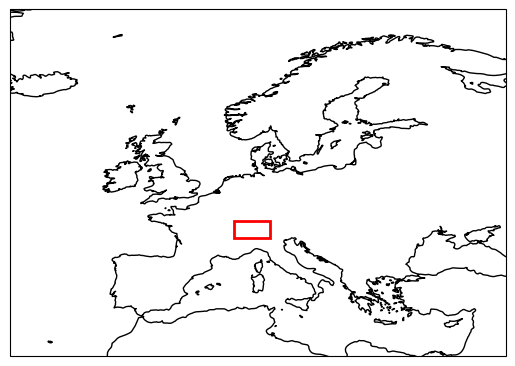

In [11]:
import cartopy.crs as ccrs
from cartopy.feature import COASTLINE
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent([-22, 40, 31, 72])
ax.add_feature(COASTLINE)
minlon, maxlon, minlat, maxlat = 6.02260949059, 10.4427014502, 45.7769477403, 47.8308275417
ax.add_patch(Rectangle([minlon, minlat], maxlon - minlon, maxlat - minlat, facecolor="none", edgecolor="red", linewidth=2))

In [12]:
def standardize(da: xr.Dataset | xr.DataArray) -> xr.Dataset | xr.DataArray:
    if (da.lon.max() > 180) and (da.lon.min() >= 0): # we prefer longitude to go from -180 to +180 rather than 0 to 360
        da = da.assign_coords(lon=(((da.lon + 180) % 360) - 180))
        da = da.sortby("lon")
    if np.diff(da.lat.values)[0] < 0: # and increasing latitudes
        da = da.reindex(lat=da.lat[::-1])
    return da

In [13]:
minlon, maxlon, minlat, maxlat = -30, 40, 20, 80 # download more than you need, just in case
ds_past_ns = (
    standardize(ds_past)
    .isel(member_id=np.arange(5))
    .isel(time=np.isin(ds_past.time.dt.year, np.arange(1970, 2000)))
    .sel(lon=slice(minlon, maxlon))
    .sel(lat=slice(minlat, maxlat))
)
ds_future_ns = (
    standardize(ds_future)
    .isel(member_id=np.arange(5))
    .isel(time=np.isin(ds_future.time.dt.year, np.arange(2070, 2100)))
    .sel(lon=slice(minlon, maxlon))
    .sel(lat=slice(minlat, maxlat))
)
ds_future_ns

<xarray.Dataset> Size: 799MB
Dimensions:      (member_id: 5, time: 10950, lat: 64, lon: 57, hist_interval: 2)
Coordinates:
  * lat          (lat) float32 256B 20.26 21.2 22.15 23.09 ... 77.75 78.69 79.63
  * member_id    (member_id) <U12 240B 'r10i1231p1f1' ... 'r1i1231p1f1'
  * time         (time) object 88kB 2070-01-01 12:00:00 ... 2099-12-31 12:00:00
    time_bounds  (time, hist_interval) object 175kB dask.array<chunksize=(10950, 2), meta=np.ndarray>
  * lon          (lon) float32 228B -30.0 -28.75 -27.5 ... 37.5 38.75 40.0
Dimensions without coordinates: hist_interval
Data variables:
    RAIN         (member_id, time, lat, lon) float32 799MB dask.array<chunksize=(1, 730, 64, 57), meta=np.ndarray>
Attributes: (12/114)
    Conventions:                               CF-1.0
    Initial_conditions_dataset:                arbitrary initialization
    PFT_physiological_constants_dataset:       clm5_params.c171117.nc
    Surface_dataset:                           surfdata_0.9x1.25_hist_78pfts_...
    Time_constant_3Dvars:                      ZSOI:DZSOI:WATSAT:SUCSAT:BSW:H...
    case_title:                                UNSET
    ...                                        ...
    intake_esm_attrs:units:                    mm/s
    intake_esm_attrs:start_time:               2015-01-01 12:00:00
    intake_esm_attrs:end_time:                 2100-12-31 12:00:00
    intake_esm_attrs:path:                     s3://ncar-cesm2-lens/lnd/daily...
    intake_esm_attrs:_data_format_:            zarr
    intake_esm_dataset_key:                    lnd.ssp370.daily.cmip6

We can finally load this very manageable amount of data into memory. 

This is when the actual downloading happens, and it might be very slow. 

This is not done very optimally by xarray, **especially for data that is originally 3D**, like wind or atmospheric temperature, even if you only ask for a 2D slice, because of the way the data is *chunked* in the remote storage. Unfortunately there is nothing we can do about this except wait.

**For your project, you should therefore do it as early as possible**

For your project, you should really run this as a standalone python script, using the `nohup` command to run it in the background for a long time.

If you are having problems accessing the data that you need in a reasonable time, there are other more involved options we can explain to you, but remember that **your project does not need to involve super heavy data to be good**!

```bash
$ nohup python my_download_script.py
```

In [ ]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    ds_past_ns = ds_past_ns.load()
ds_past_ns.to_netcdf(outpath.joinpath("precip_past.nc"))
del ds_past_ns
with ProgressBar():
    ds_future_ns = ds_future_ns.load()
ds_future_ns.to_netcdf(outpath.joinpath("precip_future.nc"))
del ds_future_ns

[########################################] | 100% Completed | 176.36 s
[########################################] | 100% Completed | 187.50 s


In [34]:
ds_future_ns = xr.open_dataset(outpath.joinpath("precip_future.nc"))
ds_future_ns

<xarray.Dataset> Size: 2GB
Dimensions:      (member: 10, time: 10950, lat: 59, lon: 81, hist_interval: 2)
Coordinates:
  * lat          (lat) float32 236B 20.26 21.2 22.15 23.09 ... 73.04 73.98 74.92
  * member       (member) <U12 480B 'r10i1231p1f1' ... 'r2i1251p1f1'
  * time         (time) object 88kB 2070-01-01 12:00:00 ... 2099-12-31 12:00:00
    time_bounds  (time, hist_interval) object 175kB ...
  * lon          (lon) float32 324B -50.0 -48.75 -47.5 ... 47.5 48.75 50.0
Dimensions without coordinates: hist_interval
Data variables:
    RAIN         (member, time, lat, lon) float32 2GB ...
Attributes: (12/114)
    Conventions:                               CF-1.0
    Initial_conditions_dataset:                arbitrary initialization
    PFT_physiological_constants_dataset:       clm5_params.c171117.nc
    Surface_dataset:                           surfdata_0.9x1.25_hist_78pfts_...
    Time_constant_3Dvars:                      ZSOI:DZSOI:WATSAT:SUCSAT:BSW:H...
    case_title:                                UNSET
    ...                                        ...
    intake_esm_attrs:units:                    mm/s
    intake_esm_attrs:start_time:               2015-01-01 12:00:00
    intake_esm_attrs:end_time:                 2100-12-31 12:00:00
    intake_esm_attrs:path:                     s3://ncar-cesm2-lens/lnd/daily...
    intake_esm_attrs:_data_format_:            zarr
    intake_esm_dataset_key:                    lnd.ssp370.daily.cmip6

For today, we simply give you this example data so you can try the other notebook. We also provide an example downloading script that you can adapt and run yourself when comes the time to download data for your project!

### Bonus: Read in the Grid Data

We also have Zarr stores of grid data, such as the area of each grid cell. We will need to follow a similar process here, querying for our experiment and extracting the dataset

In [35]:
grid_subset = catalog.search(component='atm', frequency='static', experiment='historical', forcing_variant='cmip6')

We can load in the dataset, calling `pop_item`, which grabs the dataset, assigning `_` to the meaningless key

In [36]:
_, grid = grid_subset.to_dataset_dict(aggregate=False, zarr_kwargs={"consolidated": True}, storage_options={'anon':True}).popitem()
grid


--> The keys in the returned dictionary of datasets are constructed as follows:
	'variable.long_name.component.experiment.forcing_variant.frequency.vertical_levels.spatial_domain.units.start_time.end_time.path'


<xarray.Dataset> Size: 242kB
Dimensions:   (lat: 192, lon: 288, ilev: 31, lev: 30, bnds: 2, slat: 191,
               slon: 288)
Coordinates: (12/21)
    P0        float64 8B ...
    area      (lat, lon) float32 221kB dask.array<chunksize=(192, 288), meta=np.ndarray>
    gw        (lat) float64 2kB dask.array<chunksize=(192,), meta=np.ndarray>
    hyai      (ilev) float64 248B dask.array<chunksize=(31,), meta=np.ndarray>
    hyam      (lev) float64 240B dask.array<chunksize=(30,), meta=np.ndarray>
    hybi      (ilev) float64 248B dask.array<chunksize=(31,), meta=np.ndarray>
    ...        ...
    ntrn      int32 4B ...
  * slat      (slat) float64 2kB -89.53 -88.59 -87.64 ... 87.64 88.59 89.53
  * slon      (slon) float64 2kB -0.625 0.625 1.875 3.125 ... 355.6 356.9 358.1
    time      object 8B ...
    w_stag    (slat) float64 2kB dask.array<chunksize=(191,), meta=np.ndarray>
    wnummax   (lat) int32 768B dask.array<chunksize=(192,), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    *empty*
Attributes:
    intake_esm_vars:                   nan
    intake_esm_attrs:component:        atm
    intake_esm_attrs:experiment:       historical
    intake_esm_attrs:forcing_variant:  cmip6
    intake_esm_attrs:frequency:        static
    intake_esm_attrs:spatial_domain:   global
    intake_esm_attrs:path:             s3://ncar-cesm2-lens/atm/static/grid.zarr
    intake_esm_attrs:_data_format_:    zarr
    intake_esm_dataset_key:            atm.historical.cmip6.static.global.s3:...